# importing modules

In [134]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Working with a real dataset

In [135]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [137]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [138]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [139]:
df[df['smoker'] == 'yes'].value_counts()

age  sex     bmi     children  smoker  region     charges    
18   female  21.660  0         yes     northeast  14283.45940    1
45   male    30.360  0         yes     southeast  62592.87309    1
46   male    42.350  3         yes     southeast  46151.12450    1
             30.495  3         yes     northwest  40720.55105    1
     female  35.530  0         yes     northeast  42111.66470    1
                                                                ..
31   male    29.810  0         yes     southeast  19350.36890    1
             34.390  3         yes     northwest  38746.35510    1
             36.300  2         yes     southwest  38711.00000    1
32   female  17.765  2         yes     northwest  32734.18630    1
64   male    36.960  2         yes     southeast  49577.66240    1
Name: count, Length: 274, dtype: int64

# Preprocessing

In [140]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [141]:
df['sex'] = df['sex'].astype(bool)
df['smoker'] = df['smoker'].astype(bool)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
1,18,True,33.770,1,False,southeast,1725.55230
2,28,True,33.000,3,False,southeast,4449.46200
3,33,True,22.705,0,False,northwest,21984.47061
4,32,True,28.880,0,False,northwest,3866.85520


In [142]:
region = pd.get_dummies(df['region'])
region

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [143]:
df = pd.concat([df, region], axis = 1)
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,False,27.900,0,True,southwest,16884.92400,False,False,False,True
1,18,True,33.770,1,False,southeast,1725.55230,False,False,True,False
2,28,True,33.000,3,False,southeast,4449.46200,False,False,True,False
3,33,True,22.705,0,False,northwest,21984.47061,False,True,False,False
4,32,True,28.880,0,False,northwest,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,northwest,10600.54830,False,True,False,False
1334,18,False,31.920,0,False,northeast,2205.98080,True,False,False,False
1335,18,False,36.850,0,False,southeast,1629.83350,False,False,True,False
1336,21,False,25.800,0,False,southwest,2007.94500,False,False,False,True


In [144]:
df.drop('region', axis = 1, inplace = True)

In [145]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,False,27.900,0,True,16884.92400,False,False,False,True
1,18,True,33.770,1,False,1725.55230,False,False,True,False
2,28,True,33.000,3,False,4449.46200,False,False,True,False
3,33,True,22.705,0,False,21984.47061,False,True,False,False
4,32,True,28.880,0,False,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,10600.54830,False,True,False,False
1334,18,False,31.920,0,False,2205.98080,True,False,False,False
1335,18,False,36.850,0,False,1629.83350,False,False,True,False
1336,21,False,25.800,0,False,2007.94500,False,False,False,True


In [146]:
df.fillna(df.mean(), inplace=True)

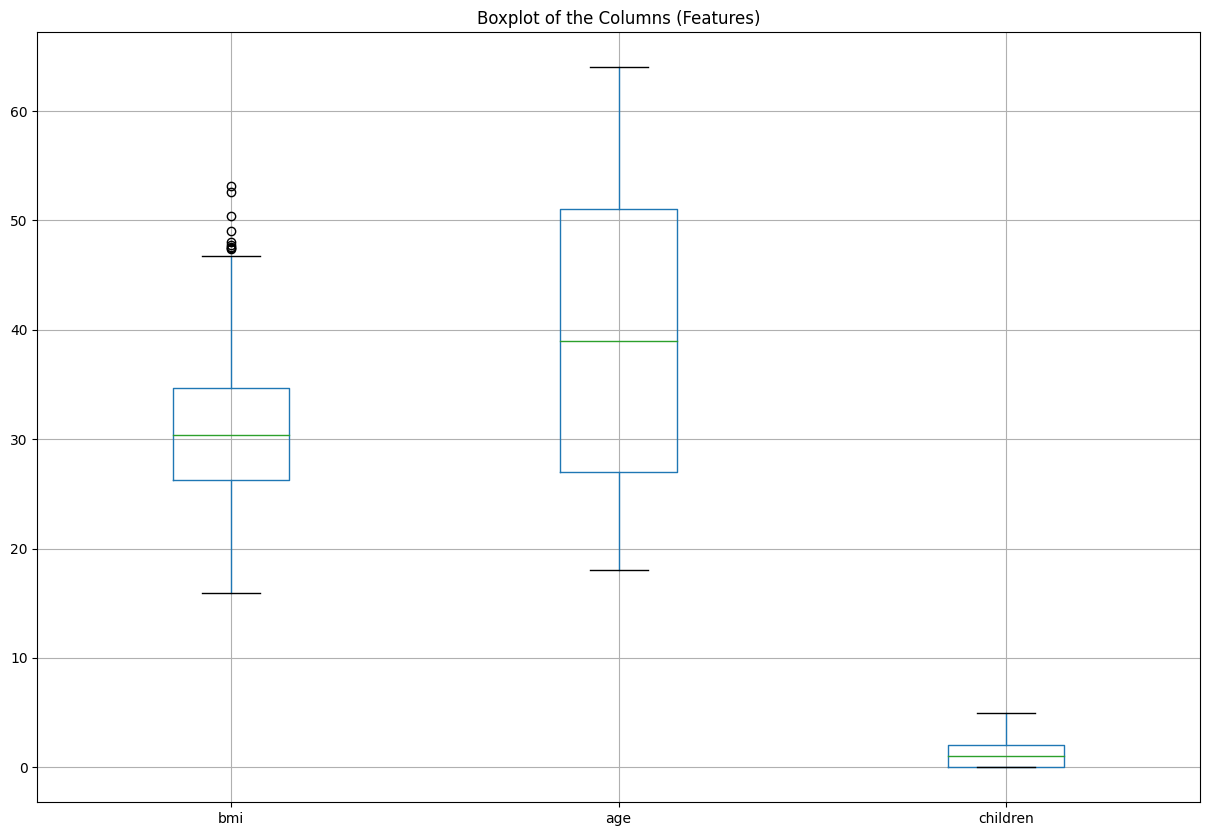

Total of 9 outliers detected. Data has been scaled.
[[-0.45332    -1.43876426 -0.90861367]
 [ 0.5096211  -1.50996545 -0.07876719]
 [ 0.38330685 -0.79795355  1.58092576]
 [-1.30553108 -0.4419476  -0.90861367]
 [-0.29255641 -0.51314879 -0.90861367]]


In [147]:
# Outlier detection

plt.figure(figsize=(15, 10))
plt.title("Boxplot of the Columns (Features)")

X = df[['bmi', 'age', 'children']]

X.boxplot()

plt.show()


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()


if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Total of {outliers} outliers detected. Data has been scaled.")
    print(X_scaled[:5])
else:
    print("No outliers detected.")

In [148]:
y = df['charges']
x = df.drop(columns='charges', axis=1)

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=80)

In [150]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [151]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Coefficients of the variables in the sklearn:  [ 3393.52028192   328.14394977  2213.09095521  -816.44363867
 11225.45483321  -196.90267474  -783.20286658    94.2646724
   990.4538668 ]


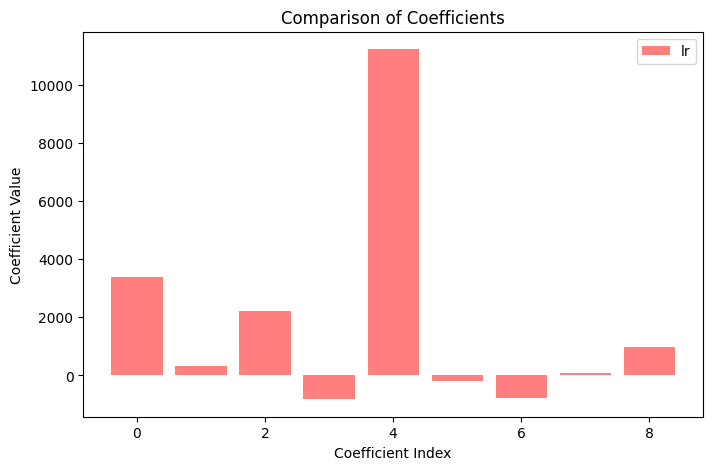

In [152]:
def visualize_coef(model, label, color):
    print("Coefficients of the variables in the sklearn: ", model.coef_)

    plt.figure(figsize=(8, 5))
    plt.bar(range(len(model.coef_)), model.coef_, label=label, color=color, alpha=0.5)
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Value")
    plt.title("Comparison of Coefficients")
    plt.legend()
    
    plt.show()
    
visualize_coef(lr, "lr", "r")

In [153]:
def calc_scores(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

r2, mse = calc_scores(lr, x_train, y_train)

print("R² score on the training dataset: ", r2)
print("MSE on the training dataset: ", mse)

R² score on the training dataset:  0.8319344950858094
MSE on the training dataset:  32403429.422762245


# Regularization

## L1

In [154]:

lasso_lr = Lasso(alpha=0.5)
lasso_lr.fit(x_train, y_train)


lasso_lr_low_alpha = Lasso(alpha=0.1)
lasso_lr_low_alpha.fit(x_train, y_train)


lasso_lr_high_alpha = Lasso(alpha=2)
lasso_lr_high_alpha.fit(x_train, y_train)

Lasso(alpha=2)

Coefficients of the variables in the sklearn:  [ 3392.99900305   327.7479087   2212.33932302  -815.45227269
 11224.97180116  -532.87612341 -1201.23904518  -340.23613892
   633.7784658 ]


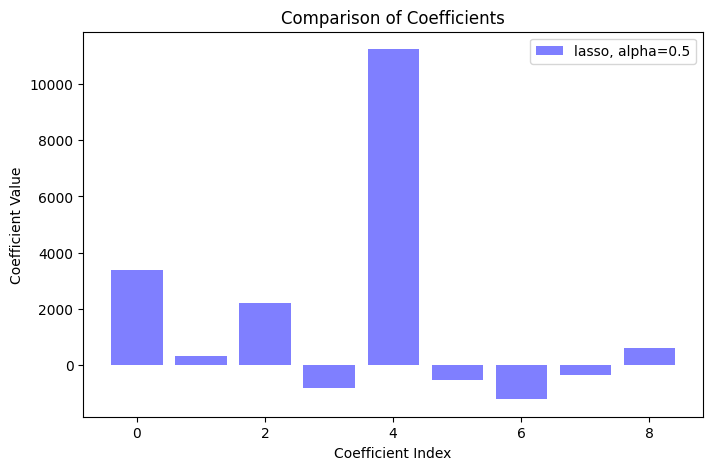

Coefficients of the variables in the sklearn:  [ 3393.41571487   328.06469011  2212.94066157  -816.2451456
 11225.35812368  -536.60169753 -1205.31443541  -344.96195163
   630.80397382]


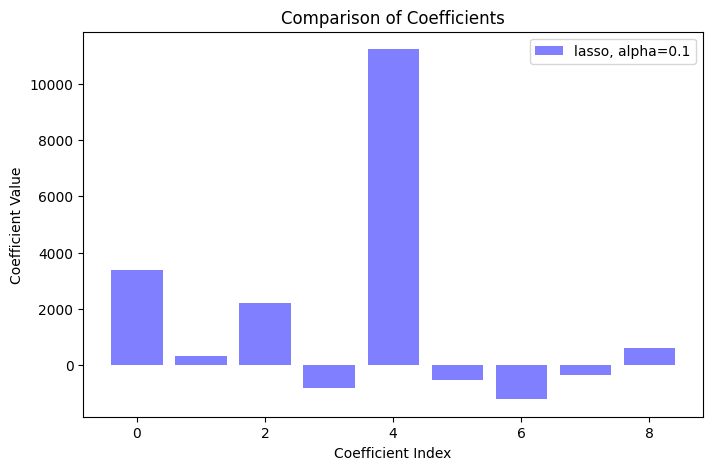

Coefficients of the variables in the sklearn:  [ 3390.66813711   325.87540258  2211.55669036  -812.44012716
 11223.76254508  -265.79008754  -872.26355567     0.
   911.08572696]


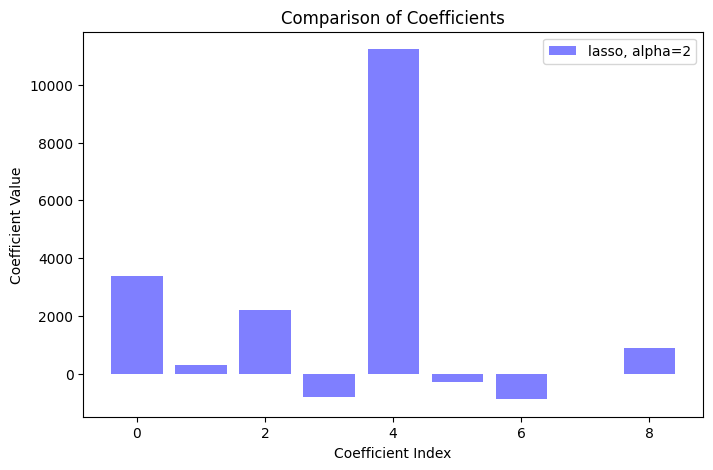

In [155]:
visualize_coef(lasso_lr, "lasso, alpha=0.5", "b")
visualize_coef(lasso_lr_low_alpha, "lasso, alpha=0.1", "b")
visualize_coef(lasso_lr_high_alpha, "lasso, alpha=2", "b")

## L2

In [156]:
Ridge_lr = Ridge(alpha=0.5)
Ridge_lr.fit(x_train, y_train)


Ridge_lr_low_alpha = Ridge(alpha=0.1)
Ridge_lr_low_alpha.fit(x_train, y_train)


Ridge_lr_high_alpha = Ridge(alpha=2)
Ridge_lr_high_alpha.fit(x_train, y_train)

Ridge(alpha=2)

Coefficients of the variables in the sklearn:  [ 3373.74584474   331.2701722   2201.99243413  -804.51392035
 11150.67221603  -177.88759744  -796.23287268   100.96422653
   979.59278329]


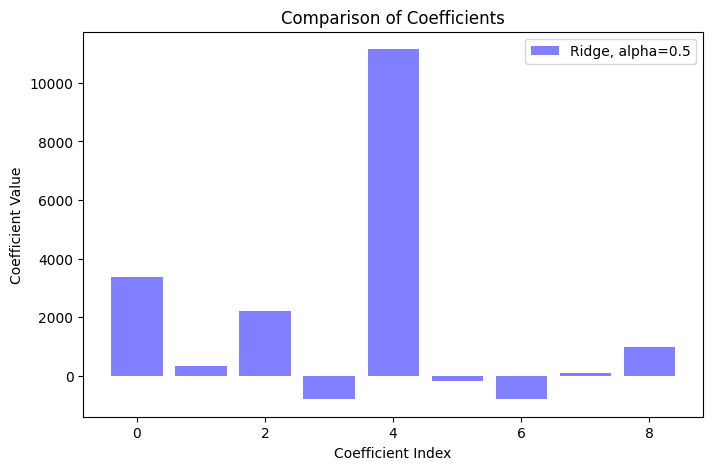

Coefficients of the variables in the sklearn:  [ 3389.54190368   328.77994345  2210.85646008  -814.02852633
 11210.41060619  -193.05946047  -785.839236      95.61892295
   988.2617869 ]


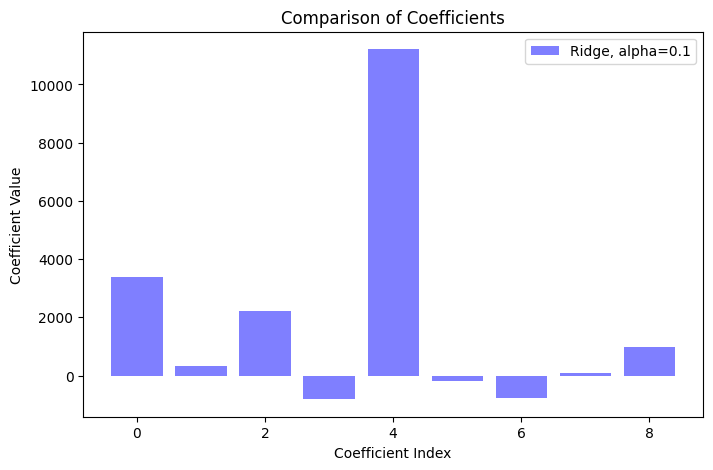

Coefficients of the variables in the sklearn:  [ 3316.12734677   339.88024626  2169.75797726  -770.80451382
 10932.71318489  -123.73715613  -833.13332051   120.03226596
   948.43429539]


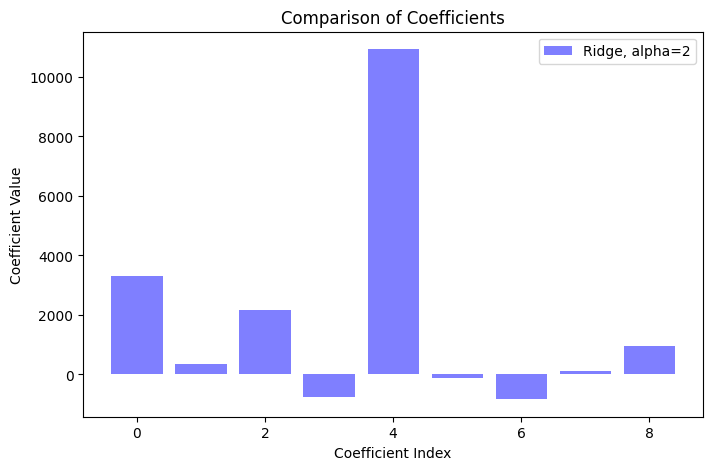

In [157]:
visualize_coef(Ridge_lr, "Ridge, alpha=0.5", "b")
visualize_coef(Ridge_lr_low_alpha, "Ridge, alpha=0.1", "b")
visualize_coef(Ridge_lr_high_alpha, "Ridge, alpha=2", "b")

In [158]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)

Cross-validated MSE for different alphas: {0.1: 1.1402326267469463, 1: 1.1402483074946776, 10: 1.1404041955098718, 100: 1.1418767036320603}


In [159]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)

Cross-validated MSE for different alphas: {0.1: 1.1402347065891507, 1: 1.1402691702269923, 10: 1.1406130815884936, 100: 1.1440520732974293}


## Adding new features

In [160]:
poly_features = PolynomialFeatures(degree=5)
X_poly = poly_features.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8)
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lr.predict(x_test))

1.2986920355029175

Coefficients of the variables in the sklearn:  [ 5.11641260e-06  3.62741998e+05 -5.72817842e+05 -8.83404888e+04
 -2.35201027e+06  1.66943677e+06  1.68187018e+05  1.04796708e+06
  4.33093744e+05 -9.53109548e+04  4.77690933e+06 -2.21448319e+06
 -3.33230715e+05 -1.90086762e+06 -5.90958782e+05  5.28155329e+05
 -7.20038167e+05 -4.87196851e+05 -1.53097198e+05 -7.98472327e+04
 -4.04060254e+06  1.31176537e+06  3.47373630e+05  1.30541838e+06
  3.92461825e+05 -4.99691464e+05  1.04927818e+06  3.32854921e+05
  4.25781858e+04 -9.12113393e+04  5.00074423e+04  3.07941759e+05
  7.60906699e+04  1.13522833e+05  6.58322048e+04  1.22303354e+06
 -1.98058976e+05 -9.71941604e+04 -4.47227116e+05 -2.36058935e+05
  1.61436105e+05 -2.21724360e+05  4.50501284e+04  1.15877564e+05
 -2.21880747e+04 -2.50164188e+05 -1.13613041e+05 -1.63464701e+05
 -3.02722994e+03  5.93638977e+04  9.49671052e+04 -8.68128737e+04
  3.02382833e+04 -5.01773416e+03 -4.41151507e+04 -2.90471405e+04]


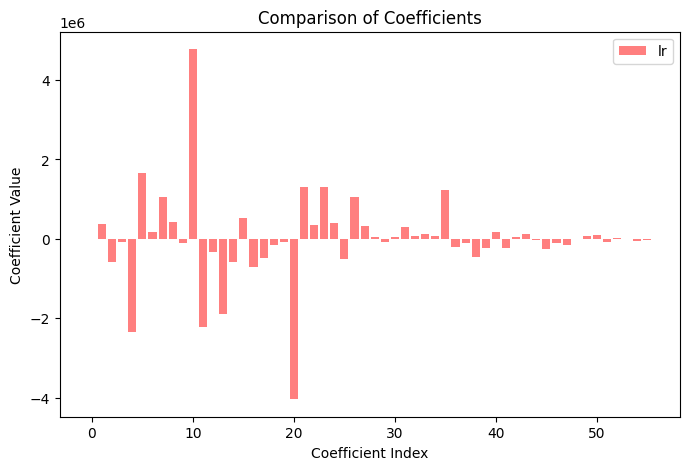

In [161]:
visualize_coef(lr, "lr", "r")

In [162]:
lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lasso.predict(x_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+08, tolerance: 1.560e+07
  model = cd_fast.enet_coordinate_descent(


1.235345787104719

Coefficients of the variables in the sklearn:  [    0.           680.52541359   776.13307785     0.
  1668.81763832   916.40027912    -0.           995.31133002
 -1294.92263185  1214.69984834     0.             0.
     0.           208.21100958   -73.74024117   784.62277374
   278.65633758    -0.            -0.            -0.
    -0.             0.          2276.24987225     0.
    -0.           295.85074625     0.             0.
    -0.            -0.             0.             0.
    -0.             0.            -0.          -980.89342205
  -466.74663827     0.            -0.         -1982.22256385
    62.53286353     0.             0.            -0.
    -0.             0.           498.14293876    -0.
     0.         -2546.0452906    452.83186226  2026.59358886
 -1471.47764165     0.           968.71685296    -0.        ]


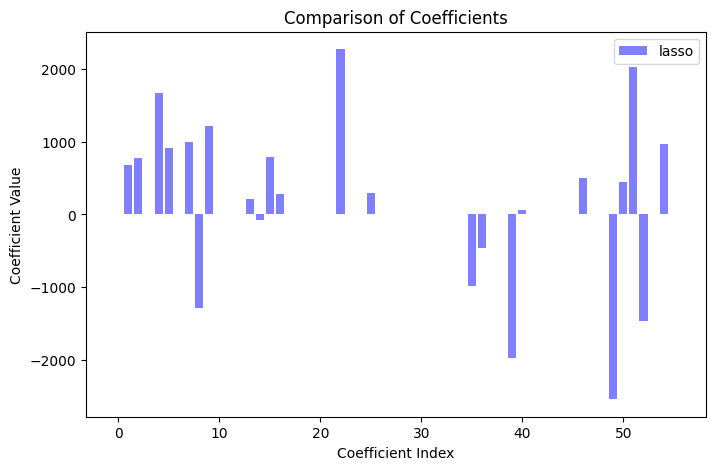

In [163]:
visualize_coef(lasso, "lasso", "b")

In [164]:
Ridge = Ridge(alpha=10)
Ridge.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, Ridge.predict(x_test))

1.2347931286297544

Coefficients of the variables in the sklearn:  [ 0.00000000e+00  8.68577906e+02  6.46602662e+02  8.39452819e+01
  1.02583888e+03  6.77373856e+02  4.64837680e+01  5.60792311e+02
 -9.17341848e+02  1.25130343e+03  4.83409680e+02  7.13076199e+02
  5.94694489e+02  5.22827954e+02 -8.83678645e+02  1.01994101e+03
  3.91257364e+02 -7.76946142e+01 -1.86903953e+01  5.53875149e+01
 -2.85230739e+02  1.77191040e+02  8.55421289e+02  2.46896282e+02
 -7.26137006e+02  8.91076077e+02  2.79665137e+02  1.48075712e+02
 -1.01162817e+02 -4.62854420e+02  2.68538125e+02  7.93175007e+02
 -5.00780168e+02  2.88362975e+02 -4.87110745e+02 -8.12903650e+02
 -7.42111460e+02  5.25015233e+02 -5.50399908e+02 -1.17041543e+03
  4.82071786e+02 -2.99328768e+02  7.77641650e+00 -2.36277604e+02
 -9.63959868e+02  2.77282640e+00  1.13151086e+03 -5.79401541e+02
  8.18405719e-01 -1.20684722e+03  2.77701567e+02  1.08674717e+03
 -1.02350629e+03  2.20473610e+02  1.08814014e+03 -4.04516163e+02]


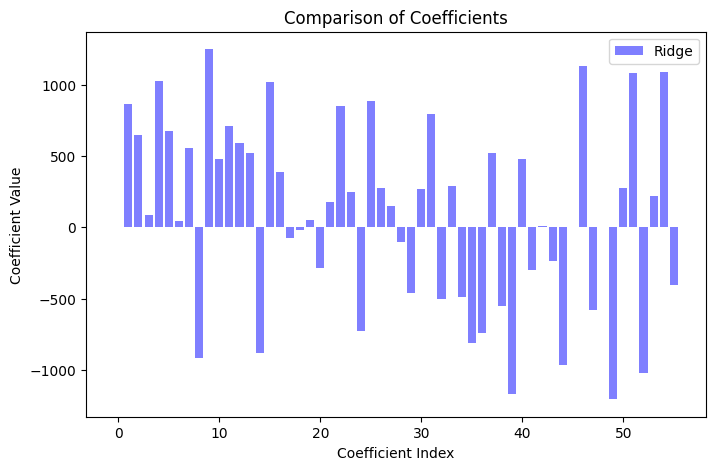

In [165]:
visualize_coef(Ridge, "Ridge", "b")